In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create syntethic data points
from sklearn.datasets import make_classification

In [3]:
X,y= make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [4]:
X

array([[-0.53764043,  2.48430733],
       [-1.12223241,  1.33080713],
       [ 0.32419924, -1.83158294],
       ...,
       [ 0.94869097,  1.04985435],
       [ 0.35651921, -0.28006167],
       [-0.92557451,  0.76608584]])

In [5]:
y

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,

In [8]:
df=pd.DataFrame(X)

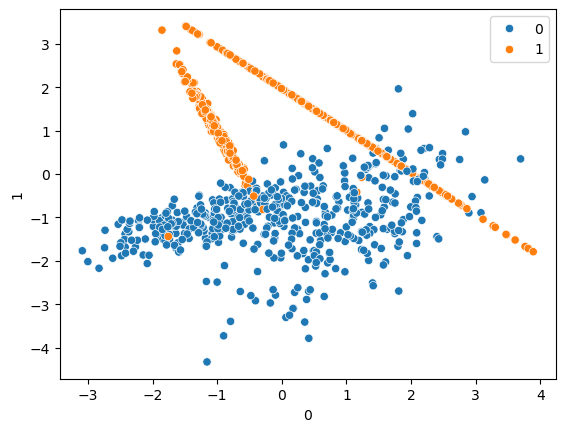

In [11]:
sns.scatterplot(x=df[0],y=df[1],hue=y)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=10)

In [13]:
from sklearn.svm import SVC 

In [14]:
svc= SVC(kernel='linear')

In [15]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [16]:
y_pred= svc.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       125
           1       0.89      0.90      0.89       125

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



In [19]:
print(confusion_matrix(y_test,y_pred))

[[111  14]
 [ 13 112]]


In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.892


## Hyper paramater tuning with SVC

In [ ]:
from sklearn.model_selection import GridSearchCV

param= {
    "C":[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001]
}

grid = GridSearchCV(SVC(),param_grid=param,cv=5,verbose=3,refit=True) # verbose lets us see the process 3 is max level

In [22]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.920 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.927 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.913 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.960 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.933 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.900 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.900 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.900 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.907 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.887 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.893 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [23]:
grid.best_params_

{'C': 1000, 'gamma': 1}

In [24]:
y_pred= grid.predict(X_test)

In [25]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       125
           1       0.97      0.96      0.96       125

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[121   4]
 [  5 120]]


In [26]:
print(accuracy_score(y_test,y_pred))

0.964
